In [1]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [2]:
model = load_model('../models/best models/exp_best_checkpoint_only.hdf5')

In [3]:
model.layers

In [4]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 56, 56, 3)]  0           []                               
                                                                                                  
 conv2d_448 (Conv2D)            (None, 56, 56, 64)   4864        ['input_11[0][0]']               
                                                                                                  
 batch_normalization_109 (Batch  (None, 56, 56, 64)  256         ['conv2d_448[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d_120 (MaxPooling2  (None, 54, 54, 64)  0           ['batch_normalization_109[0

In [33]:
model.get_weights()

[array([[[[ 0.05097449,  0.02406091, -0.18630883, ..., -0.04150168,
            0.13107714, -0.06329586],
          [-0.18933465, -0.10744053, -0.16007306, ..., -0.12989858,
           -0.17179841, -0.01084286],
          [-0.12741809, -0.05379774, -0.21426752, ..., -0.01952402,
            0.12052071, -0.13102092]],
 
         [[-0.01032438,  0.34332594, -0.35970965, ..., -0.01119816,
            0.21288869,  0.00481892],
          [-0.13404565, -0.34595764, -0.29615203, ..., -0.01525054,
           -0.51980865, -0.00968932],
          [-0.08527821,  0.01799003, -0.14724062, ...,  0.1028114 ,
            0.27646646, -0.03334402]],
 
         [[ 0.06121311,  0.4042556 , -0.2225033 , ..., -0.15380663,
            0.20082588,  0.05489678],
          [ 0.01451927, -0.40087742, -0.19931528, ..., -0.12271576,
           -0.29708996, -0.06430767],
          [-0.30988586, -0.0901855 , -0.25824347, ..., -0.05374303,
            0.2334188 ,  0.04999631]]],
 
 
        [[[ 0.00229292, -0.0266210

In [5]:
tf.saved_model.save(model, '../models/best models/VGGNetInception_BE_WOAD')

INFO:tensorflow:Assets written to: ../models/best models/VGGNetInception_BE_WOAD\assets


In [36]:
# convert tensorflow model into tensorflow lite

converter = tf.lite.TFLiteConverter.from_saved_model('../models/best models/VGGNet_BE_WA')
tflite_model = converter.convert()
tflite_model_path = '../models/TFLite model/VGGNet_BE_WA.tflite'

with open(tflite_model_path, 'wb') as file:
    file.write(tflite_model)

In [6]:
converter = tf.lite.TFLiteConverter.from_saved_model('../models/best models/VGGNetInception_BE_WOAD')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
tflite_model_path = '../models/TFLite model/VGGNetInception_BE_WOAD.tflite'

with open(tflite_model_path, 'wb') as file:
    file.write(tflite_model)

In [37]:
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

In [38]:
interpreter.get_input_details()

[{'name': 'serving_default_input_1:0',
  'index': 0,
  'shape': array([ 1, 56, 56,  3]),
  'shape_signature': array([-1, 56, 56,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [39]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 86,
  'shape': array([ 1, 42]),
  'shape_signature': array([-1, 42]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

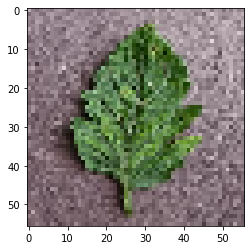

In [40]:
test_image = load_img(
    path='../data/image data/test/Tomato/Tomato mosaic virus/b8a9c9dd-fbba-41e2-b75d-7fd7f990cda0___PSU_CG 2185.JPG',
    target_size=(56, 56))
plt.imshow(test_image)

In [41]:
test_image = img_to_array(test_image) / 255.0
test_image = test_image.reshape((1, 56, 56, 3))
test_image

array([[[[0.74509805, 0.6784314 , 0.7176471 ],
         [0.56078434, 0.49411765, 0.53333336],
         [0.49803922, 0.43137255, 0.47058824],
         ...,
         [0.6901961 , 0.6313726 , 0.65882355],
         [0.5764706 , 0.5176471 , 0.54509807],
         [0.6117647 , 0.5529412 , 0.5803922 ]],

        [[0.4862745 , 0.41960785, 0.45882353],
         [0.6       , 0.53333336, 0.57254905],
         [0.6313726 , 0.5647059 , 0.6039216 ],
         ...,
         [0.7372549 , 0.6784314 , 0.7058824 ],
         [0.6745098 , 0.6156863 , 0.6431373 ],
         [0.74509805, 0.6862745 , 0.7137255 ]],

        [[0.6156863 , 0.54901963, 0.5882353 ],
         [0.57254905, 0.5058824 , 0.54509807],
         [0.6431373 , 0.5764706 , 0.6156863 ],
         ...,
         [0.6901961 , 0.6313726 , 0.65882355],
         [0.7254902 , 0.6666667 , 0.69411767],
         [0.65882355, 0.6       , 0.627451  ]],

        ...,

        [[0.57254905, 0.49019608, 0.5176471 ],
         [0.49411765, 0.4117647 , 0.4392157 ]

In [42]:
# make predictions
input_dtl = interpreter.get_input_details()
output_dtl = interpreter.get_output_details()

interpreter.set_tensor(input_dtl[0]['index'], test_image)
interpreter.invoke()
pred = interpreter.get_tensor(output_dtl[0]['index'])

In [43]:
classes_ = ['Apple', 'Apple scab', 'Bacterial Blight (CBB)', 'Bacterial spot',
            'Black rot', 'Brown Streak Disease (CBSD)', 'BrownSpot', 'Cassava',
            'Cedar apple rust', 'Cercospora leaf spot Gray leaf spot',
            'Cherry (including sour)', 'Common rust', 'Corn (maize)',
            'Early blight', 'Esca (Black Measles)', 'Grape',
            'Green Mottle (CGM)', 'Haunglongbing (Citrus greening)', 'Healthy',
            'Hispa', 'Late blight', 'Leaf Mold',
            'Leaf blight (Isariopsis Leaf Spot)', 'Leaf scorch', 'LeafBlast',
            'Mosaic Disease (CMD)', 'Northern Leaf Blight', 'Orange', 'Peach',
            'Pepper, bell', 'Potato', 'Powdery mildew', 'Rice',
            'Septoria leaf spot', 'Spider mites Two-spotted spider mite',
            'Squash', 'Strawberry', 'Target Spot', 'Tomato',
            'Tomato Yellow Leaf Curl Virus', 'Tomato mosaic virus', 'healthy']
p = zip(list(classes_), list(pred[0]))
p = sorted(list(p), key=lambda z: z[1], reverse=True)
p

[('Tomato', 1.0),
 ('Tomato mosaic virus', 1.0),
 ('Spider mites Two-spotted spider mite', 1.9829952e-30),
 ('Septoria leaf spot', 8.654542e-31),
 ('Tomato Yellow Leaf Curl Virus', 2.8930822e-34),
 ('healthy', 2.8429847e-35),
 ('Target Spot', 7.796459e-36),
 ('Bacterial spot', 9.810401e-38),
 ('Apple', 2.938265e-39),
 ('Apple scab', 2.938265e-39),
 ('Bacterial Blight (CBB)', 2.938265e-39),
 ('Black rot', 2.938265e-39),
 ('Brown Streak Disease (CBSD)', 2.938265e-39),
 ('BrownSpot', 2.938265e-39),
 ('Cassava', 2.938265e-39),
 ('Cedar apple rust', 2.938265e-39),
 ('Cercospora leaf spot Gray leaf spot', 2.938265e-39),
 ('Cherry (including sour)', 2.938265e-39),
 ('Common rust', 2.938265e-39),
 ('Corn (maize)', 2.938265e-39),
 ('Early blight', 2.938265e-39),
 ('Esca (Black Measles)', 2.938265e-39),
 ('Grape', 2.938265e-39),
 ('Green Mottle (CGM)', 2.938265e-39),
 ('Haunglongbing (Citrus greening)', 2.938265e-39),
 ('Healthy', 2.938265e-39),
 ('Hispa', 2.938265e-39),
 ('Late blight', 2.93826